In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sympy import *
import lmfit



In [3]:
def ratelessthan1(row):
        if row['rate'] < 1:
            return False
        else:
            return True

In [4]:
class DecayingSineModel(lmfit.Model):
    def __init__(self, *args, **kwargs):
        def decaying_sine(x,b,d):
            return pow(x,b)/(pow(x,b)+d)
        super(DecayingSineModel, self).__init__(decaying_sine, *args, **kwargs)

    def guess(self, data, **kwargs):
        params = self.make_params(b= 1.22, d= 3.33)
        return lmfit.models.update_param_vals(params, self.prefix, **kwargs)

In [5]:
def getModel(year):
    df = pd.read_csv(year)
    df["New"]= int('0')
    df.sort_values(by = ['rate'], ascending= [True])
    for county in df:
        df["New"] =  abs(df.index - 58)+1
    df2 = pd.DataFrame(columns=['rate', 'ccount'])
    for key in range(500):
        df2 = df2.append({"rate": key, "ccount":len(df[df['rate']<key])/60},ignore_index = True)
    print(df2)
    model = DecayingSineModel()
    params = model.guess(df2['ccount'], x=df2['rate'])
    
    params['b'].max=10
    params['b'].min=0.5
    #params['d'].max=20000
    #params['d'].min=1
    
    print(params)
    fit = model.fit(df2['ccount'], params, x=df2['rate']) #,nan_policy='omit')
    return fit, df2


In [6]:
f, df2 = getModel('AllDrugsTeenager2021.csv')

      rate    ccount
0      0.0  0.000000
1      1.0  0.150000
2      2.0  0.150000
3      3.0  0.150000
4      4.0  0.150000
..     ...       ...
495  495.0  0.983333
496  496.0  0.983333
497  497.0  0.983333
498  498.0  0.983333
499  499.0  0.983333

[500 rows x 2 columns]
Parameters([('b', <Parameter 'b', value=1.22, bounds=[0.5:10]>), ('d', <Parameter 'd', value=3.33, bounds=[-inf:inf]>)])


/var/folders/h4/r6tpj_q56gb11bpc5pv3wfyr0000gn/T/ipykernel_5897/2637806008.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({"rate": key, "ccount":len(df[df['rate']<key])/60},ignore_index = True)
/var/folders/h4/r6tpj_q56gb11bpc5pv3wfyr0000gn/T/ipykernel_5897/2637806008.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({"rate": key, "ccount":len(df[df['rate']<key])/60},ignore_index = True)
/var/folders/h4/r6tpj_q56gb11bpc5pv3wfyr0000gn/T/ipykernel_5897/2637806008.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({"rate": key, "ccount":len(df[df['rate']<key])/60},ignore_index = True)
/var/folders/h4/r6tpj_q56gb11bpc5pv3wfyr0000gn/T/ipykernel_5897/2637806008.py:9: Futu

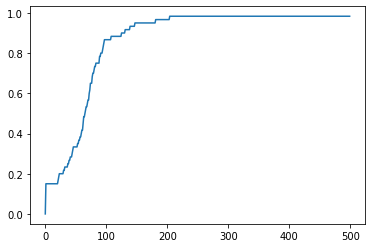

In [7]:
x = df2['rate']
y= df2['ccount']
plt.plot(x,y)

In [8]:
f.params["b"].value,f.params["d"].value

(2.720741985481949, 65792.52395790175)

In [9]:
f,df2= getModel('AllDrugsTeenager2016.csv')

      rate    ccount
0      0.0  0.000000
1      1.0  0.133333
2      2.0  0.133333
3      3.0  0.133333
4      4.0  0.133333
..     ...       ...
495  495.0  0.966667
496  496.0  0.966667
497  497.0  0.966667
498  498.0  0.966667
499  499.0  0.966667

[500 rows x 2 columns]
Parameters([('b', <Parameter 'b', value=1.22, bounds=[0.5:10]>), ('d', <Parameter 'd', value=3.33, bounds=[-inf:inf]>)])


/var/folders/h4/r6tpj_q56gb11bpc5pv3wfyr0000gn/T/ipykernel_5897/2637806008.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({"rate": key, "ccount":len(df[df['rate']<key])/60},ignore_index = True)
/var/folders/h4/r6tpj_q56gb11bpc5pv3wfyr0000gn/T/ipykernel_5897/2637806008.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({"rate": key, "ccount":len(df[df['rate']<key])/60},ignore_index = True)
/var/folders/h4/r6tpj_q56gb11bpc5pv3wfyr0000gn/T/ipykernel_5897/2637806008.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({"rate": key, "ccount":len(df[df['rate']<key])/60},ignore_index = True)
/var/folders/h4/r6tpj_q56gb11bpc5pv3wfyr0000gn/T/ipykernel_5897/2637806008.py:9: Futu

In [10]:
f.params["b"].value,f.params["d"].value

(2.3132040792162494, 15500.59698430052)

In [11]:
df2

,rate,ccount
0,0.0,0.000000
1,1.0,0.133333
2,2.0,0.133333
3,3.0,0.133333
4,4.0,0.133333
...,...,...
495,495.0,0.966667
496,496.0,0.966667
497,497.0,0.966667
498,498.0,0.966667


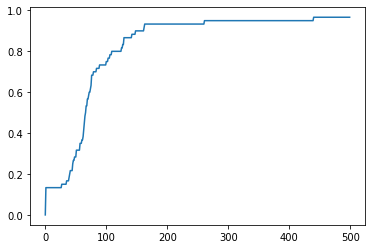

In [12]:
x = df2['rate']
y= df2['ccount']
plt.plot(x,y)

In [13]:
files = ['AllDrugsTeenager2021.csv','AllDrugsTeenager2020.csv','AllDrugsTeenager2019.csv','AllDrugsTeenager2018.csv','AllDrugsTeenager2017.csv','AllDrugsTeenager2016.csv']
bval = []
dval = []
year = []
for file in files:
    f,df2 = getModel(file)
    year.append(file)
    bval.append(f.params["b"].value)
    dval.append(f.params["d"].value)

/var/folders/h4/r6tpj_q56gb11bpc5pv3wfyr0000gn/T/ipykernel_5897/2637806008.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({"rate": key, "ccount":len(df[df['rate']<key])/60},ignore_index = True)
/var/folders/h4/r6tpj_q56gb11bpc5pv3wfyr0000gn/T/ipykernel_5897/2637806008.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({"rate": key, "ccount":len(df[df['rate']<key])/60},ignore_index = True)
/var/folders/h4/r6tpj_q56gb11bpc5pv3wfyr0000gn/T/ipykernel_5897/2637806008.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({"rate": key, "ccount":len(df[df['rate']<key])/60},ignore_index = True)
/var/folders/h4/r6tpj_q56gb11bpc5pv3wfyr0000gn/T/ipykernel_5897/2637806008.py:9: Futu

      rate    ccount
0      0.0  0.000000
1      1.0  0.150000
2      2.0  0.150000
3      3.0  0.150000
4      4.0  0.150000
..     ...       ...
495  495.0  0.983333
496  496.0  0.983333
497  497.0  0.983333
498  498.0  0.983333
499  499.0  0.983333

[500 rows x 2 columns]
Parameters([('b', <Parameter 'b', value=1.22, bounds=[0.5:10]>), ('d', <Parameter 'd', value=3.33, bounds=[-inf:inf]>)])
      rate    ccount
0      0.0  0.000000
1      1.0  0.116667
2      2.0  0.116667
3      3.0  0.116667
4      4.0  0.116667
..     ...       ...
495  495.0  0.983333
496  496.0  0.983333
497  497.0  0.983333
498  498.0  0.983333
499  499.0  0.983333

[500 rows x 2 columns]
Parameters([('b', <Parameter 'b', value=1.22, bounds=[0.5:10]>), ('d', <Parameter 'd', value=3.33, bounds=[-inf:inf]>)])
      rate    ccount
0      0.0  0.000000
1      1.0  0.133333
2      2.0  0.133333
3      3.0  0.133333
4      4.0  0.133333
..     ...       ...
495  495.0  0.966667
496  496.0  0.966667
497  497.0  0.966

/var/folders/h4/r6tpj_q56gb11bpc5pv3wfyr0000gn/T/ipykernel_5897/2637806008.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({"rate": key, "ccount":len(df[df['rate']<key])/60},ignore_index = True)
/var/folders/h4/r6tpj_q56gb11bpc5pv3wfyr0000gn/T/ipykernel_5897/2637806008.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({"rate": key, "ccount":len(df[df['rate']<key])/60},ignore_index = True)
/var/folders/h4/r6tpj_q56gb11bpc5pv3wfyr0000gn/T/ipykernel_5897/2637806008.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({"rate": key, "ccount":len(df[df['rate']<key])/60},ignore_index = True)
/var/folders/h4/r6tpj_q56gb11bpc5pv3wfyr0000gn/T/ipykernel_5897/2637806008.py:9: Futu

      rate    ccount
0      0.0  0.000000
1      1.0  0.116667
2      2.0  0.116667
3      3.0  0.116667
4      4.0  0.116667
..     ...       ...
495  495.0  0.983333
496  496.0  0.983333
497  497.0  0.983333
498  498.0  0.983333
499  499.0  0.983333

[500 rows x 2 columns]
Parameters([('b', <Parameter 'b', value=1.22, bounds=[0.5:10]>), ('d', <Parameter 'd', value=3.33, bounds=[-inf:inf]>)])
      rate    ccount
0      0.0  0.000000
1      1.0  0.150000
2      2.0  0.150000
3      3.0  0.150000
4      4.0  0.150000
..     ...       ...
495  495.0  0.983333
496  496.0  0.983333
497  497.0  0.983333
498  498.0  0.983333
499  499.0  0.983333

[500 rows x 2 columns]
Parameters([('b', <Parameter 'b', value=1.22, bounds=[0.5:10]>), ('d', <Parameter 'd', value=3.33, bounds=[-inf:inf]>)])
      rate    ccount
0      0.0  0.000000
1      1.0  0.133333
2      2.0  0.133333
3      3.0  0.133333
4      4.0  0.133333
..     ...       ...
495  495.0  0.966667
496  496.0  0.966667
497  497.0  0.966

/var/folders/h4/r6tpj_q56gb11bpc5pv3wfyr0000gn/T/ipykernel_5897/2637806008.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({"rate": key, "ccount":len(df[df['rate']<key])/60},ignore_index = True)
/var/folders/h4/r6tpj_q56gb11bpc5pv3wfyr0000gn/T/ipykernel_5897/2637806008.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({"rate": key, "ccount":len(df[df['rate']<key])/60},ignore_index = True)
/var/folders/h4/r6tpj_q56gb11bpc5pv3wfyr0000gn/T/ipykernel_5897/2637806008.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({"rate": key, "ccount":len(df[df['rate']<key])/60},ignore_index = True)
/var/folders/h4/r6tpj_q56gb11bpc5pv3wfyr0000gn/T/ipykernel_5897/2637806008.py:9: Futu

In [14]:
bval

[2.720741985481949,
 2.5313991421373956,
 2.511921671809,
 2.8445847425716693,
 2.85360236173597,
 2.3132040792162494]

In [15]:
year

['AllDrugsTeenager2021.csv',
 'AllDrugsTeenager2020.csv',
 'AllDrugsTeenager2019.csv',
 'AllDrugsTeenager2018.csv',
 'AllDrugsTeenager2017.csv',
 'AllDrugsTeenager2016.csv']

In [16]:
dval

[65792.52395790175,
 33907.58260373023,
 33722.50588968501,
 164031.1193912594,
 114069.07177009954,
 15500.59698430052]

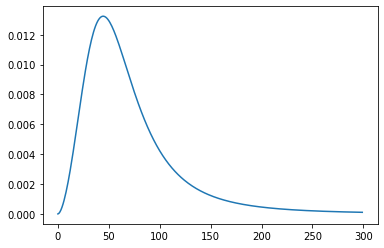

In [17]:
year_no=0
density_x=[]
rate_y=[]
for x in range(300):
    b = bval[year_no]
    d = dval[year_no]
    q = pow(x,b)
    density_x.append(x)
    y_rate=d*b*pow(x,b-1)/(pow((q+d),2)) #derivativeofb&dequation
    rate_y.append(y_rate)

plt.plot(density_x,rate_y)

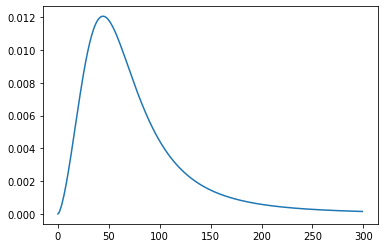

In [18]:
year_no=1
density_x=[]
rate_y=[]

for x in range(300):
    b = bval[year_no]
    d = dval[year_no]
    q = pow(x,b)
    density_x.append(x)
    y_rate=d*b*pow(x,b-1)/(pow((q+d),2))
    rate_y.append(y_rate)


plt.plot(density_x,rate_y)

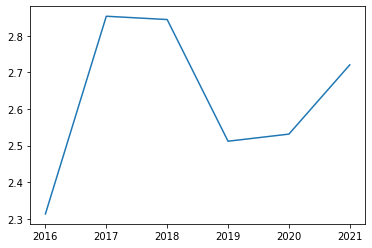

In [19]:
x = [2021,2020,2019,2018,2017,2016]
y = bval
plt.plot(x,y )

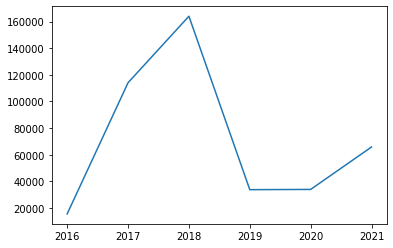

In [20]:
x = [2021,2020,2019,2018,2017,2016]
y = dval
plt.plot(x,y )

In [21]:
def prime3(x,b,d):
    q = pow(x,b)
    return (d*b*pow(x,b-1))/(pow((q+d),2))

In [22]:
bval_1 = bval[0:3]
bval_1

[2.720741985481949, 2.5313991421373956, 2.511921671809]

In [23]:
plt.rcParams["figure.figsize"] = (20,10)

0
1
2
3
4


Text(0, 0.5, 'Probability based on number of counties')

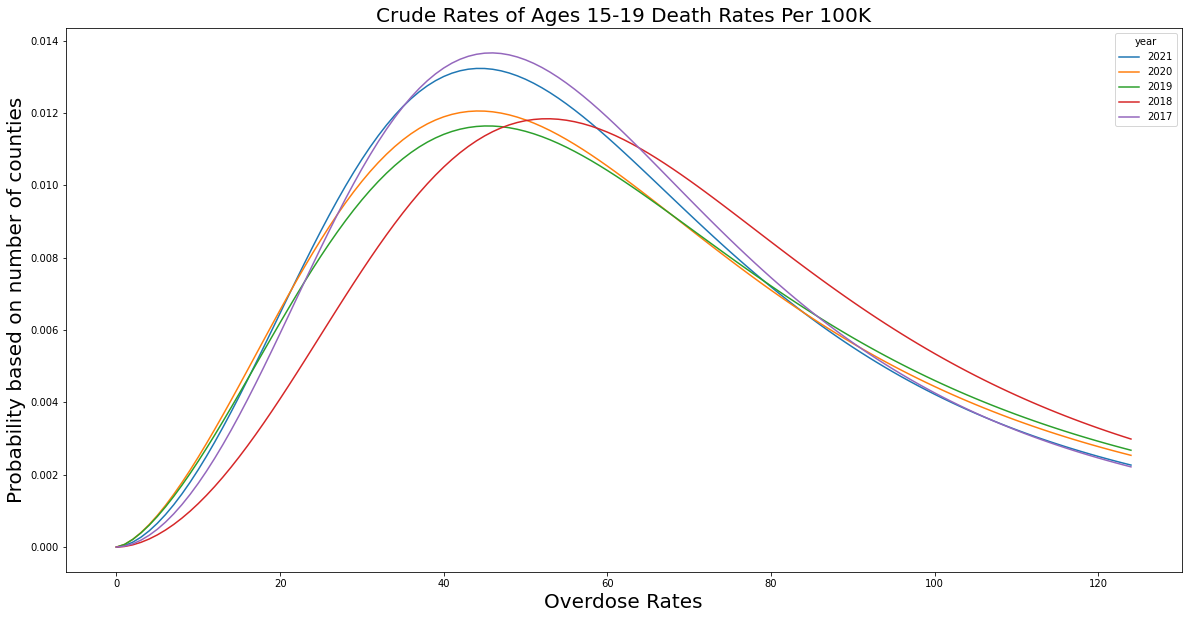

In [26]:
bval_1 = bval[0:5]
bval_1 = dval[0:5]
year2= [2021,2020,2019,2018,2017]
for m in range(len(bval_1)):
    print(m)
    x = []
    y= []
    b = bval[m]
    d = dval[m]
    for i in range(125):
        x.append(i)
        y.append(prime3(x[i],b,d))
    plt.plot(x,y,label= str(year2[m]))
plt.legend(title='year')
plt.title("Crude Rates of Ages 15-19 Death Rates Per 100K", fontsize = 20)
plt.xlabel("Overdose Rates", fontsize = 20)
plt.ylabel("Probability based on number of counties",fontsize = 20)

In [144]:
plt.rcParams["figure.figsize"] = (20,10)

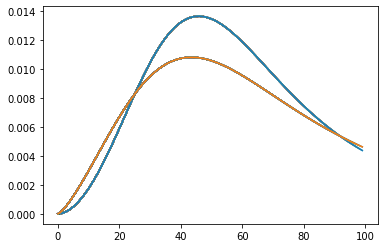

In [141]:
bval_2 = bval[4:]
dval_2 = dval[4:]
for m in range(len(bval_2)):
    x = []
    y= []
    b = bval_2[m]
    d = dval_2[m]
    for i in range(100):
        x.append(i)
        y.append(prime3(x[i],b,d))
        plt.plot(x,y,label= str(year2[m]))
    plt.plot(x,y)

In [ ]:
3#